In [ ]:
import numpy as np


def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [ ]:
def plot_loss_and_params(test_losses):

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,4))
    # ax1.plot(train_losses[10:], label="train-loss")
    ax1.plot(test_losses[:], label="test-loss")
    ax1.set_title('loss')
    # ax2.stem(self.theta, use_line_collection=True)
    # ax2.set_title('params values')
    # ax3.hist(self.theta, 50, facecolor='g', alpha=0.75)
    # ax3.set_title('params histogram')

    plt.show()

In [ ]:
import numpy as np
class AdamOptim():
    def __init__(self, eta=0.01, beta1=0.5, beta2=0.5, epsilon=0.1):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
    def update(self, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    


    def fit_sgd(self, X, y):
        train_losses=[]
        
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for iteration in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) 
            db = (1 / n_samples) * np.sum(y_predicted - y) 

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            train_losses.append(mean_squared_error(y, y_predicted))
            
            if iteration%100==0:
              print(mean_squared_error(y, y_predicted),self.weights,self.bias,'############during training loss')
        # plot_loss_and_params(train_losses)
        return train_losses
    



    def fit_momentum(self, X, y):
        train_losses=[]
        
        n_samples, n_features = X.shape

        dw=0
        db=0
        momentum=0.3
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for iteration in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + momentum*dw
            db = (1 / n_samples) * np.sum(y_predicted - y) + momentum*db

            self.weights -= self.lr * dw
            self.bias -= self.lr * db


            train_losses.append(mean_squared_error(y, y_predicted))
            
            if iteration%100==0:
              print(mean_squared_error(y, y_predicted),self.weights,self.bias,'############during training loss')
        # plot_loss_and_params(train_losses)
        return train_losses


    def fit_adagrad(self, X, y):
      train_losses=[]
        
      n_samples, n_features = X.shape

      dws2=0
      dbs2=0
      # init parameters
      self.weights = np.zeros(n_features)
      self.bias = 0
      
      for iteration in range(self.n_iters):
          y_predicted = np.dot(X, self.weights) + self.bias
          # compute gradients
          base_dw=(1 / n_samples) * np.dot(X.T, (y_predicted - y))
          base_db = (1 / n_samples) * np.sum(y_predicted - y)

          dw= self.lr / (np.sqrt(dws2 + 0.1)) * base_dw
          db= self.lr / (np.sqrt(dbs2 + 0.1)) * base_db

          dws2+=dw**2
          dbs2+=db**2

          self.weights -=  dw
          self.bias -=  db

          train_losses.append(mean_squared_error(y, y_predicted))
          
          if iteration%100==0:
            print(mean_squared_error(y, y_predicted),self.weights,self.bias,'############during training loss')
      # plot_loss_and_params(train_losses)
      return train_losses




    def fit_rmsprop(self, X, y):
      train_losses=[]
        
      n_samples, n_features = X.shape

      dws2=0
      dbs2=0
      # init parameters
      self.weights = np.zeros(n_features)
      self.bias = 0
      
      for iteration in range(self.n_iters):
          y_predicted = np.dot(X, self.weights) + self.bias
          # compute gradients
          base_dw=(1 / n_samples) * np.dot(X.T, (y_predicted - y))
          base_db = (1 / n_samples) * np.sum(y_predicted - y)

          dw= self.lr / (np.sqrt(dws2 + 0.1)) * base_dw
          db= self.lr / (np.sqrt(dbs2 + 0.1)) * base_db
          
          Beta=0.9
          dws2=(1-Beta)*dw**2+Beta*dws2
          dbs2=(1-Beta)*db**2+Beta*dbs2

          

          self.weights -=  dw
          self.bias -=  db


          train_losses.append(mean_squared_error(y, y_predicted))
          
          if iteration%100==0:
            print(mean_squared_error(y, y_predicted),self.weights,self.bias,'############during training loss')
      # plot_loss_and_params(train_losses)
      return train_losses


    def fit_ada_delta(self, X, y):
      train_losses=[]  
      n_samples, n_features = X.shape
      dws2=0
      dbs2=0
      self.weights = np.zeros(n_features)
      self.bias = 0
      # dw=0
      # db=0
      delta_pw=0
      delta_pb=0

      E_p_w=E_p_b=0
      for iteration in range(self.n_iters):
        y_predicted = np.dot(X, self.weights) + self.bias
                    #Adadelta

        base_dw=(1 / n_samples) * np.dot(X.T, (y_predicted - y))
        base_db = (1 / n_samples) * np.sum(y_predicted - y)

        Beta=0.9
        dws2=(1-Beta)*base_dw**2+Beta*dws2
        dbs2=(1-Beta)*base_db**2+Beta*dbs2

        E_p_w=(1-Beta)*delta_pw**2+Beta*E_p_w
        E_p_b=(1-Beta)*delta_pb**2+Beta*E_p_b

        delta_pw =(np.sqrt(E_p_w + 0.1)) / (np.sqrt(dws2 + 0.1)) * base_dw
        delta_pb =(np.sqrt(E_p_b + 0.1)) / (np.sqrt(dbs2 + 0.1)) * base_db

        # dw= self.lr / (np.sqrt(dws2 + 0.1)) * base_dw
        # db= self.lr / (np.sqrt(dbs2 + 0.1)) * base_db
        
        self.weights -=  delta_pw
        self.bias -=  delta_pb
        train_losses.append(mean_squared_error(y, y_predicted))
            
        if iteration%100==0:
              print(mean_squared_error(y, y_predicted),self.weights,self.bias,'############during training loss')
      # plot_loss_and_params(train_losses)
      return train_losses




    def fit_adam(self, X, y):
        train_losses=[]
        
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        m_a = v_a = m_b = v_b = 0
        moment_m_a = moment_v_a = moment_m_b = moment_v_b = 0
        t = 0
        error = np.array([])
        train_losses=[]
        prev_error = 0
        b1=0.9
        b2=0.5


        '''
        ## dw, db are from current minibatch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b
        '''
        c=10
        adam = AdamOptim()

        for iteration in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            

            #Adam
            # base_dw=(1 / n_samples) * np.dot(X.T, (y_predicted - y))
            # base_db = (1 / n_samples) * np.sum(y_predicted - y)

            # m_dw = beta1*m_dw + (1-beta1)*base_dw
            # m_db = beta1*m_db + (1-beta1)*base_db

            # m_dw = 1
            # m_db = 1

            # v_dw = beta2*v_dw + (1-beta2)*(base_dw**2)
            # v_db = beta2*v_db + (1-beta2)*(base_db**2)

            # m_dw_corr = m_dw/(1-beta1**t)
            # m_db_corr = m_db/(1-beta1**t)
            # v_dw_corr = v_dw/(1-beta2**t)
            # v_db_corr = v_db/(1-beta2**t)
            
            # m_dw_corr = m_dw/(1-beta1**t)
            # m_db_corr = m_db/(1-beta1**t)
            # v_dw_corr = v_dw/(1-beta2**t)
            # v_db_corr = v_db/(1-beta2**t)
            # t+=1

            # self.weights -= self.lr*(m_dw/(np.sqrt(v_dw+0.1)))*base_dw
            # self.bias -= self.lr*(m_db/(np.sqrt(v_db+0.1)))*base_db



            
            #######Adam
            base_dw=(1 / n_samples) * np.dot(X.T, (y_predicted - y))
            base_db = (1 / n_samples) * np.sum(y_predicted - y)


            # self.weights, self.bias = adam.update(t,w=self.weights, b=self.bias, dw=base_dw, db=base_db)
            # t+=1
            gradient_a, gradient_b = base_dw,base_db
            # print('i=',iteration,abs(mean_squared_error(y, y_predicted) - prev_error))
            iteration+=1

            t += 1
            prev_error = mean_squared_error(y, y_predicted)
            train_losses.append(prev_error)

            m_a = b1 * m_a + (1-b1)*gradient_a
            v_a = b2 * v_a + (1-b2)*gradient_a**2
            m_b = b1 * m_b + (1-b1)*gradient_b
            v_b = b2 * v_b + (1-b2)*gradient_b**2
            moment_m_a = m_a / (1-b1**t)
            moment_v_a = v_a / (1-b2**t)
            moment_m_b = m_b / (1-b1**t)
            moment_v_b = v_b / (1-b2**t)
            self.weights -= (self.lr*moment_m_a) / (moment_v_a**0.5 + 1e-8)
            self.bias -= (self.lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
            
            # m_a = v_a = m_b = v_b = 0
            # moment_m_a = moment_v_a = moment_m_b = moment_v_b = 0
            # t = 0
            # error = np.array([])
            # train_losses=[]
            # iteration=1
            # while True:
            #     gradient_a, gradient_b = gradient(a, b, x, y)
            #     print('i=',iteration,abs(mse(a, b, x, y) - prev_error))
            #     iteration+=1
            #     if abs(mse(a, b, x, y) - prev_error) < epsilon:
            #         break
            #     t += 1
            #     prev_error = mse(a, b, x, y)
            #     train_losses.append(prev_error)
            #     error = np.insert(error, len(error), prev_error)

            #     m_a = b1 * m_a + (1-b1)*gradient_a
            #     v_a = b2 * v_a + (1-b2)*gradient_a**2
            #     m_b = b1 * m_b + (1-b1)*gradient_b
            #     v_b = b2 * v_b + (1-b2)*gradient_b**2
            #     moment_m_a = m_a / (1-b1**t)
            #     moment_v_a = v_a / (1-b2**t)
            #     moment_m_b = m_b / (1-b1**t)
            #     moment_v_b = v_b / (1-b2**t)
            #     a -= (lr*moment_m_a) / (moment_v_a**0.5 + 1e-8)
            #     b -= (lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
            train_losses.append(mean_squared_error(y, y_predicted))
            
            if iteration%100==0:
              print(mean_squared_error(y, y_predicted),self.weights,self.bias,'############during training loss')
        # plot_loss_and_params(train_losses)
        return train_losses

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

6305.634907410722 [0.0071869  0.08140905] -0.0012305884081135177 ############during training loss
5110.554144140417 [0.66625539 7.77183844] -0.09876079740819912 ############during training loss
4159.570914059814 [ 1.21792535 14.63543545] -0.15135527787021644 ############during training loss
3402.6623175621617 [ 1.67662977 20.76152654] -0.1665416165672997 ############during training loss
2800.0812112528392 [ 2.05501894 26.22975451] -0.15082487378083462 ############during training loss
2320.241717538685 [ 2.36417084 31.11113083] -0.10981460819276186 ############during training loss
1938.0403790613498 [ 2.61377749 35.46897344] -0.0483368507769605 ############during training loss
1633.5231238093504 [ 2.81230973 39.35974247] 0.02946723786524503 ############during training loss
1390.8267430387177 [ 2.96716306 42.83378501] 0.12005448871081675 ############during training loss
1197.3382939569588 [ 3.0847865  45.93599887] 0.22040326048064088 ############during training loss
6305.634907410722 [0.

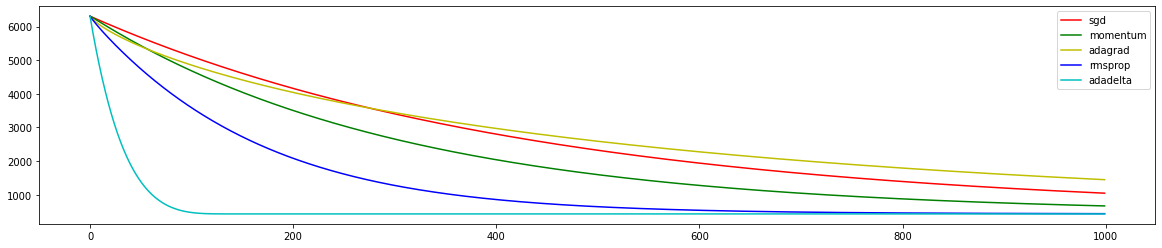

MSE: 4126.189849158418
Accuracy: 0.35449185565517455


In [ ]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(
        n_samples=100, n_features=2, noise=20, random_state=9
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    regressor = LinearRegression(learning_rate=0.001, n_iters=1000)

    loss_sgd=regressor.fit_sgd(X_train, y_train)
    loss_momentum=regressor.fit_momentum(X_train, y_train)
    loss_adagrad=regressor.fit_adagrad(X_train, y_train)
    loss_fit_rmsprop=regressor.fit_rmsprop(X_train, y_train)
    loss_ada_delta=regressor.fit_ada_delta(X_train, y_train)

    loss_adam=regressor.fit_adam(X_train, y_train)

    predictions = regressor.predict(X_test)
    
    
    
    
    
    
    
    
    fig, (ax1) = plt.subplots(1, 1, figsize=(20,4))
    ax1.plot(loss_sgd[:], color='r', label='sgd')
    ax1.plot(loss_momentum[:], color='g', label='momentum')
    ax1.plot(loss_adagrad[:], color='y', label='adagrad')
    ax1.plot(loss_fit_rmsprop[:], color='b', label='rmsprop')
    ax1.plot(loss_ada_delta[:], color='c', label='adadelta')
    # ax1.plot(loss_adam[:], label="test-loss",color='k', label='adam')

    # ax1.set_title('loss')
    # ax2.stem(self.theta, use_line_collection=True)
    # ax2.set_title('params values')
    # ax3.hist(self.theta, 50, facecolor='g', alpha=0.75)
    # ax3.set_title('params histogram')
    plt.legend()

    plt.show()
    
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    # cmap = plt.get_cmap("viridis")
    # fig = plt.figure(figsize=(8, 6))
    # m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    # m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    # plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    # plt.show()